In [1]:
def cot(x):
    return cos(x) / sin(x)


def flteq(x, y):
    return abs(x - y) < full(x.shape, 1e-15)


from matplotlib.pyplot import *
from numpy import *
from numpy.random import dirichlet, uniform
from generate_states import make_cs

In [8]:
# Mia Celeste helped me with vectorizing these functions and all of the hellish jank that entailed
def geta0(theta, thetaprime, r, zeta):
    return 0.5 * sqrt(
        1
        + cos(theta) * cos(thetaprime)
        + r * (cos(theta) + cos(thetaprime))
        + sqrt(1 - r ** 2) * cos(zeta) * sin(theta) * sin(thetaprime)
    )


def geta1(theta, thetaprime, r, zeta):
    return 0.5 * sqrt(
        1
        - cos(theta) * cos(thetaprime)
        + r * (cos(theta) - cos(thetaprime))
        - sqrt(1 - r ** 2) * cos(zeta) * sin(theta) * sin(thetaprime)
    )


def geta2(theta, thetaprime, r, zeta):
    return 0.5 * sqrt(
        1
        - cos(theta) * cos(thetaprime)
        - r * (cos(theta) - cos(thetaprime))
        - sqrt(1 - r ** 2) * cos(zeta) * sin(theta) * sin(thetaprime)
    )


def geta3(theta, thetaprime, r, zeta):
    return 0.5 * sqrt(
        1
        + cos(theta) * cos(thetaprime)
        - r * (cos(theta) + cos(thetaprime))
        + sqrt(1 - r ** 2) * cos(zeta) * sin(theta) * sin(thetaprime)
    )


#@errstate(all="ignore")
def getphi0(theta, thetaprime, r, zeta):
    length = theta.size
    return where(
        flteq(zeta, zeros(length))
        | flteq(r, ones(length))
        | flteq(theta, zeros(length))
        | flteq(thetaprime, zeros(length)),
        zeros(length),
        arctan2(
            sin(zeta),
            cos(zeta) + sqrt((1 + r) / (1 - r)) * cot(theta / 2) * cot(thetaprime / 2),
        arctan2(sqrt((1-r)/2)*sin(zeta)*sin(theta/2)*sin(thetaprime/2),sqrt((1+r)/2)*cos(theta/2)*cos(thetaprime/2)+sqrt((1-r)/2)*cos(zeta)*sin(theta/2)*sin(thetaprime/2)
        ))
    # return arctan2(sqrt((1 - r) / 2) * sin(zeta) * sin(theta / 2) * sin(thetaprime / 2),
    #                sqrt((1 + r) / 2) * cos(theta / 2) * cos(thetaprime / 2) +
    #                sqrt((1 - r) / 2) * cos(zeta) * sin(theta / 2) * sin(thetaprime / 2))
    )


#@errstate(all="ignore")
def getphi1(theta, thetaprime, r, zeta, psiprime):
    length = theta.size
    return (psiprime +
            where(
                flteq(zeta, full(length, pi))
                | flteq(r, ones(length))
                | flteq(theta, zeros(length))
                | flteq(thetaprime, full(length, pi)),
                zeros(length),
                arctan2(
                    -sin(zeta),
                    -cos(zeta) + sqrt((1 + r) / (1 - r)) * cot(theta / 2) * tan(theta / 2),
                ))
    # return (  #psiprime +
    #         arctan2(-sqrt((1 - r) / 2) * sin(zeta) * sin(theta / 2) * sin(thetaprime / 2),
    #                 sqrt((1 + r) / 2) * cos(theta / 2) * sin(thetaprime / 2) -
    #                 sqrt((1 - r) / 2) * cos(zeta) * sin(theta / 2) * cos(thetaprime / 2))
    #         - getphi0(theta, thetaprime, r, zeta)
    )  #% (2 * pi)


#@errstate(all="ignore")
def getphi2(theta, thetaprime, r, zeta, psi):
    length = theta.size
    return (psi +
            where(
                flteq(zeta, full(length, pi))
                | flteq(r, ones(length))
                | flteq(theta, full(length, pi))
                | flteq(thetaprime, zeros(length)),
                zeros(length),
                arctan2(
                    -sin(zeta),
                    -cos(zeta)
                    + sqrt((1 + r) / (1 - r)) * tan(theta / 2) * cot(thetaprime / 2),
                ))
    # return (  #psi +
    #         arctan2(-sqrt((1 - r) / 2) * sin(zeta) * cos(theta / 2) * sin(thetaprime / 2),
    #                 sqrt((1 + r) / 2) * sin(theta / 2) * cos(thetaprime / 2) -
    #                 sqrt((1 - r) / 2) * cos(zeta) * cos(theta / 2) * sin(thetaprime / 2))
            - getphi0(theta, thetaprime, r, zeta)
    )  #% (2 * pi)


#@errstate(all="ignore")
def getphi3(theta, thetaprime, r, zeta, psi, psiprime):
    length = theta.size
    return (psi + psiprime +
            where(
                flteq(zeta, zeros(length))
                | flteq(r, ones(length))
                | flteq(theta, full(length, pi))
                | flteq(thetaprime, full(length, pi)),
                zeros(length),
                arctan2(
                    sin(zeta),
                    cos(zeta)
                    + sqrt((1 + r) / (1 - r)) * tan(theta / 2) * tan(thetaprime / 2),
                ))
    # return (  #psi + psiprime +
    #         arctan2(sqrt((1 - r) / 2) * sin(zeta) * cos(theta / 2) * cos(thetaprime / 2),
    #                 sqrt((1 + r) / 2) * sin(theta / 2) * sin(thetaprime / 2) +
    #                 sqrt((1 - r) / 2) * cos(zeta) * cos(theta / 2) * cos(thetaprime / 2))
            - getphi0(theta, thetaprime, r, zeta)
    )  #% (2 * pi)


def oldgetaphi(theta, thetaprime, r, zeta, psi, psiprime):
    return (
        geta0(theta, thetaprime, r, zeta),
        geta1(theta, thetaprime, r, zeta),
        geta2(theta, thetaprime, r, zeta),
        geta3(theta, thetaprime, r, zeta),
        getphi1(theta, thetaprime, r, zeta, psiprime),
        getphi2(theta, thetaprime, r, zeta, psi),
        getphi3(theta, thetaprime, r, zeta, psi, psiprime),
        getphi0(theta, thetaprime, r, zeta)
    )

In [11]:
def oldsampleaphi(samps):
    theta = arccos(uniform(-1, 1, samps))
    psi = uniform(0, 2 * pi, samps)
    thetaprime = arccos(uniform(-1, 1, samps))
    psiprime = uniform(0, 2 * pi, samps)
    r = cbrt(uniform(0, 1, samps))
    zeta = uniform(0, 2 * pi, samps)
    return oldgetaphi(theta, thetaprime, r, zeta, psi, psiprime)

In [2]:
def getaphi(theta, thetaprime, r, zeta, psi, psiprime):
    q_plus = sqrt((1 + r) / 2)
    q_minus = sqrt((1 - r) / 2)
    c, s = make_cs(theta, psi)
    c_prime, s_prime = make_cs(thetaprime, psiprime)
    b0 = q_plus * c * c_prime + q_minus * exp(1j * zeta) * conj(s) * conj(s_prime)
    b1 = q_plus * c * s_prime - q_minus * exp(1j * zeta) * conj(s) * conj(c_prime)
    b2 = q_plus * s * c_prime - q_minus * exp(1j * zeta) * conj(c) * conj(s_prime)
    b3 = q_plus * s * s_prime + q_minus * exp(1j * zeta) * conj(c) * conj(c_prime)
    p0 = angle(b0)
    return (abs(b0), abs(b1), abs(b2), abs(b3), angle(b1) - p0, angle(b2) - p0, angle(b3) - p0, p0)

In [13]:
def sampleaphi(samps):
    theta = arccos(uniform(-1, 1, samps))
    psi = uniform(0, 2 * pi, samps)
    thetaprime = arccos(uniform(-1, 1, samps))
    psiprime = uniform(0, 2 * pi, samps)
    #r = cos(uniform(0,pi/2,samps))
    #r = sqrt(uniform(0, 0.25, samps))+0.5
    #r = uniform(0.525,1,samps)
    r = cbrt(uniform(0, 1, samps))
    #r = cos(uniform(-pi/2,pi/2,samps))
    # chi = arccos(uniform(1/sqrt(2),1,samps))
    # chi = arccos(uniform(0, 1 / sqrt(2), samps))
    # r = cos(2 * chi)
    # ur = uniform(0,1,samps)
    # r = 1-2*(2-sqrt(2))*ur+(3-2*sqrt(2))*ur**2
    #r = uniform(0,1,samps)
    #r = 2 * uniform(1/sqrt(2),1,samps)**2 - 1
    zeta = uniform(0, 2 * pi, samps)
    return getaphi(theta, thetaprime, r, zeta, psi, psiprime)

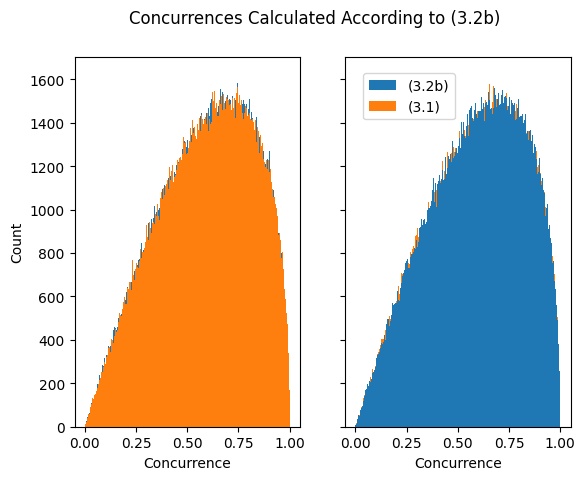

In [15]:
a0, a1, a2, a3, p1, p2, p3, p0 = sampleaphi(1000000)


# hist(a0**2, bins=linspace(0, 1, 1000));
# mean(a0**2), std(a0**2), sqrt(0.25 * 0.75 / 5)
# hist(dirichlet(ones(4), 1000000)[:, 0], bins=linspace(0, 1, 1000));

def concurrence(a0, a1, a2, a3, p1, p2, p3):
    return 2 * abs(a0 * a3 * exp(1j * p3) - a1 * exp(1j * p1) * a2 * exp(1j * p2))


newp1, newp2, newp3 = uniform(0, 2 * pi, (3, 1000000))
newa = sqrt(dirichlet(ones(4), 1000000))

fig, (ax1, ax2) = subplots(1, 2)

fig.suptitle("Concurrences Calculated According to (3.2b)")

for ax in fig.get_axes():
    ax.set(xlabel='Concurrence', ylabel='Count')
    ax.label_outer()

ax1.hist(concurrence(a0, a1, a2, a3, p1, p2, p3), bins=1000, color='tab:blue', label='(3.2b)');
ax1.hist(concurrence(newa[:, 0], newa[:, 1], newa[:, 2], newa[:, 3], newp1, newp2, newp3), bins=1000, color='tab:orange', label='(3.1)');

ax2.hist(concurrence(newa[:, 0], newa[:, 1], newa[:, 2], newa[:, 3], newp1, newp2, newp3), bins=1000, color='tab:orange');
ax2.hist(concurrence(a0, a1, a2, a3, p1, p2, p3), bins=1000, color='tab:blue');

fig.legend(loc=(.62,.75));

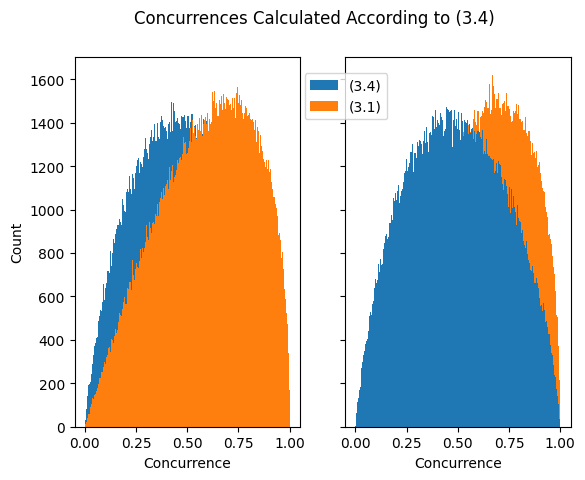

In [17]:
old_a0, old_a1, old_a2, old_a3, old_p1, old_p2, old_p3, old_p0 = oldsampleaphi(1000000)


# hist(a0**2, bins=linspace(0, 1, 1000));
# mean(a0**2), std(a0**2), sqrt(0.25 * 0.75 / 5)
# hist(dirichlet(ones(4), 1000000)[:, 0], bins=linspace(0, 1, 1000));

fig, (ax1, ax2) = subplots(1, 2)

fig.suptitle("Concurrences Calculated According to (3.4)")

for ax in fig.get_axes():
    ax.set(xlabel='Concurrence', ylabel='Count')
    ax.label_outer()

ax1.hist(concurrence(old_a0, old_a1, old_a2, old_a3, old_p1, old_p2, old_p3), bins=1000, color='tab:blue', label='(3.4)');
ax1.hist(concurrence(newa[:, 0], newa[:, 1], newa[:, 2], newa[:, 3], newp1, newp2, newp3), bins=1000, color='tab:orange', label='(3.1)');

ax2.hist(concurrence(newa[:, 0], newa[:, 1], newa[:, 2], newa[:, 3], newp1, newp2, newp3), bins=1000, color='tab:orange');
ax2.hist(concurrence(old_a0, old_a1, old_a2, old_a3, old_p1, old_p2, old_p3), bins=1000, color='tab:blue');

fig.legend(loc=(.52,.75));

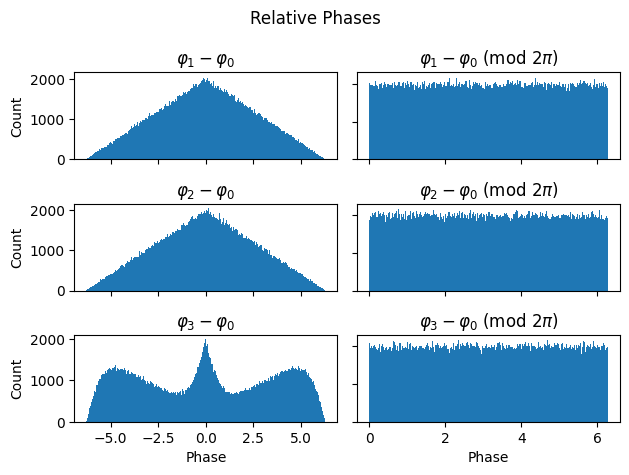

In [11]:
a0, a1, a2, a3, p1, p2, p3, p0 = sampleaphi(1000000)

fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = subplots(3,2)

fig.suptitle("Relative Phases")

for ax in fig.get_axes():
    ax.set(xlabel='Phase', ylabel='Count')
    ax.label_outer()

ax1.hist(p1,bins=1000);
ax1.set_title(r'$\varphi_1-\varphi_0$');
ax2.hist(p1%(2*pi),bins=1000);
ax2.set_title(r'$\varphi_1-\varphi_0$ (mod $2\pi$)');

ax3.hist(p2,bins=1000);
ax3.set_title(r'$\varphi_2-\varphi_0$');
ax4.hist(p2%(2*pi),bins=1000);
ax4.set_title(r'$\varphi_2-\varphi_0$ (mod $2\pi$)');

ax5.hist(p3,bins=1000);
ax5.set_title(r'$\varphi_3-\varphi_0$');
ax6.hist(p3%(2*pi),bins=1000);
ax6.set_title(r'$\varphi_3-\varphi_0$ (mod $2\pi$)');

fig.tight_layout()

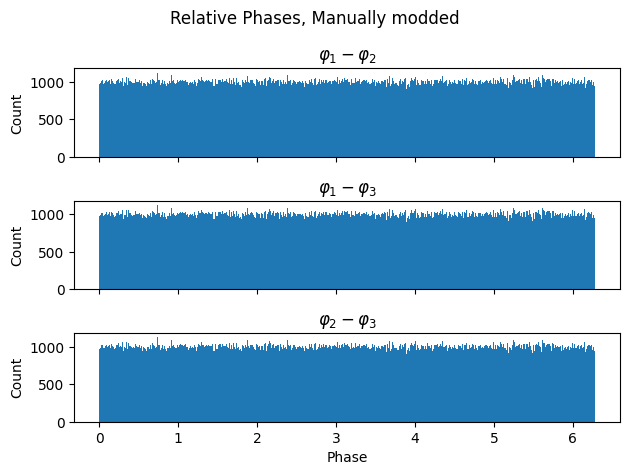

In [43]:
a0, a1, a2, a3, p1, p2, p3, p0 = sampleaphi(1000000)

fig, (ax1,ax2,ax3) = subplots(3,1)

fig.suptitle("Relative Phases, Manually modded")

for ax in fig.get_axes():
    ax.set(xlabel='Phase', ylabel='Count')
    ax.label_outer()

rel12 = p1 - p2
ax1.hist(where(rel12 < zeros(rel12.shape), rel12 + 2*pi, rel12),bins=1000);
ax1.set_title(r'$\varphi_1-\varphi_2$');

rel13 = p1 - p3
ax2.hist(where(rel12 < zeros(rel12.shape), rel12 + 2*pi, rel12),bins=1000);
ax2.set_title(r'$\varphi_1-\varphi_3$');

rel23 = p2 - p3
ax3.hist(where(rel12 < zeros(rel12.shape), rel12 + 2*pi, rel12),bins=1000);
ax3.set_title(r'$\varphi_2-\varphi_3$');

fig.tight_layout()

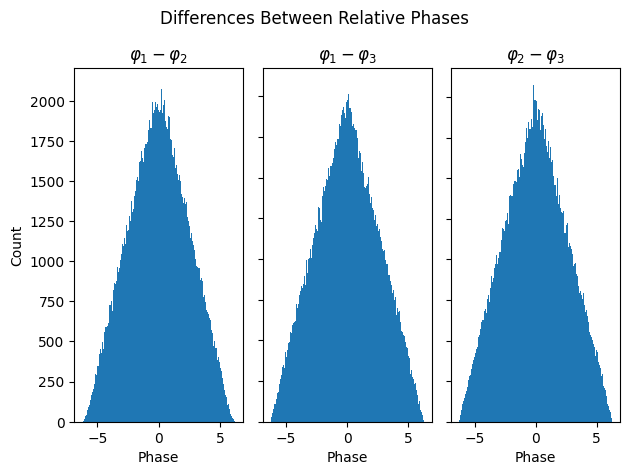

In [12]:
a0, a1, a2, a3, p1, p2, p3, p0 = sampleaphi(1000000)

fig, (ax1,ax2,ax3) = subplots(1,3)

fig.suptitle("Differences Between Relative Phases")

for ax in fig.get_axes():
    ax.set(xlabel='Phase', ylabel='Count')
    ax.label_outer()

ax1.hist(p1-p2,bins=1000);
ax1.set_title(r'$\varphi_1-\varphi_2$');

ax2.hist(p1-p3,bins=1000);
ax2.set_title(r'$\varphi_1-\varphi_3$');

ax3.hist(p2-p3,bins=1000);
ax3.set_title(r'$\varphi_2-\varphi_3$');

fig.tight_layout()

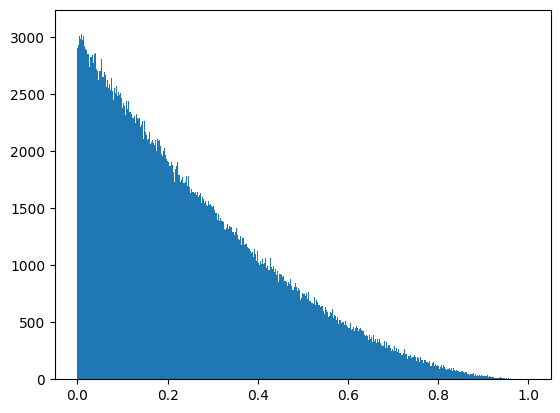

In [9]:
hist(dirichlet(ones(4), 1000000)[:, 0], bins=linspace(0, 1, 1000));

In [6]:
def varsamps(n, samps):
    theta = arccos(uniform(-1, 1, samps))
    psi = uniform(0, 2 * pi, samps)
    thetaprime = arccos(uniform(-1, 1, samps))
    psiprime = uniform(0, 2 * pi, samps)
    r = (uniform(0, 1, samps)) ** (1 / n)
    zeta = uniform(0, 2 * pi, samps)
    return getaphi(theta, thetaprime, r, zeta, psi, psiprime)

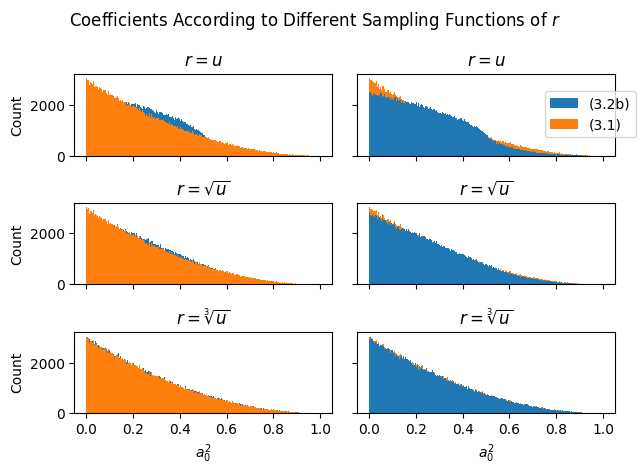

In [7]:
a0_1, _, _, _, _, _, _, _ = varsamps(1, 1000000)
a0_2, _, _, _, _, _, _, _ = varsamps(2, 1000000)
a0_3, _, _, _, _, _, _, _ = varsamps(3, 1000000)

dir = dirichlet(ones(4), 1000000)[:, 0]

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = subplots(3, 2)

#rcParams['text.usetex'] = False
fig.suptitle('Coefficients According to Different Sampling Functions of $r$')

for ax in fig.get_axes():
    ax.set(xlabel=r'$a_0^2$', ylabel='Count')
    ax.label_outer()

ax1.hist(a0_1 ** 2, bins=linspace(0, 1, 1000), label='(3.2b)', color='tab:blue')
ax1.hist(dir, bins=linspace(0, 1, 1000), label='(3.1)', color='tab:orange')
ax1.set_title(r'$r=u$')

ax2.hist(dir, bins=linspace(0, 1, 1000), color='tab:orange')
ax2.hist(a0_1 ** 2, bins=linspace(0, 1, 1000), color='tab:blue')
ax2.set_title(r'$r=u$')

ax3.hist(a0_2 ** 2, bins=linspace(0, 1, 1000), color='tab:blue')
ax3.hist(dir, bins=linspace(0, 1, 1000), color='tab:orange')
ax3.set_title(r'$r=\sqrt{u}$')

ax4.hist(dir, bins=linspace(0, 1, 1000), color='tab:orange')
ax4.hist(a0_2 ** 2, bins=linspace(0, 1, 1000), color='tab:blue')
ax4.set_title(r'$r=\sqrt{u}$')

ax5.hist(a0_3 ** 2, bins=linspace(0, 1, 1000), color='tab:blue')
ax5.hist(dir, bins=linspace(0, 1, 1000), color='tab:orange')
ax5.set_title(r'$r=\sqrt[3]{u}$')

ax6.hist(dir, bins=linspace(0, 1, 1000), color='tab:orange')
ax6.hist(a0_3 ** 2, bins=linspace(0, 1, 1000), color='tab:blue')
ax6.set_title(r'$r=\sqrt[3]{u}$')

fig.legend(loc=(.85, .71))
fig.tight_layout();

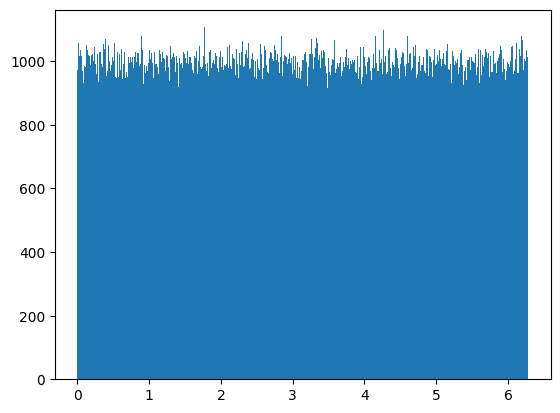

In [703]:
samps = 1000000
theta = arccos(uniform(-1, 1, samps))
psi = uniform(0, 2 * pi, samps)
thetaprime = arccos(uniform(-1, 1, samps))
psiprime = uniform(0, 2 * pi, samps)
# eta = arccos(uniform(0,1,samps))
# r = cos(eta)
# chi = arccos(uniform(1/sqrt(2),1,samps))
# r = cos(2*chi)
#chi = arccos(uniform(1/sqrt(2),1,samps))
#r = cos(2*chi)
r = uniform(0, 1, samps)
zeta = uniform(0, 2 * pi, samps)

a0, _, _, _, phi1, _, _, _ = getaphi(theta, thetaprime, r, zeta, psi, psiprime)

hist(phi1%(2*pi), bins=1000);

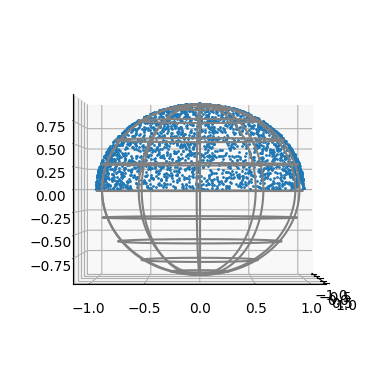

In [27]:
samps = 2500
theta = arccos(uniform(-1, 1, samps))
psi = uniform(0, 2 * pi, samps)
thetaprime = arccos(uniform(-1, 1, samps))
psiprime = uniform(0, 2 * pi, samps)
#r = cos(uniform(0,pi/2,samps))
#r = sqrt(uniform(0, 0.25, samps))+0.5
#r = uniform(0.525,1,samps)
#r = cbrt(uniform(0, 1, samps))
#r = cos(uniform(-pi/2,pi/2,samps))
#chi = arccos(uniform(1/sqrt(2),1,samps))
#chi = arccos(uniform(0,1/sqrt(2),samps))
#r = cos(2*chi)
# ur = uniform(0,1,samps)
# r = 1-2*(2-sqrt(2))*ur+(3-2*sqrt(2))*ur**2
#r = uniform(0,1,samps)
eta = arccos(uniform(0, 1, samps))
zeta = uniform(0, 2 * pi, samps)

from matplotlib.pyplot import draw, pause
from mpl_toolkits import mplot3d

# # mean(r), std(r)
# # mean(zeta * r**2), std(zeta * r**2)
# # fig, ax = subplots(subplot_kw={'projection':'polar'})
# # ax.plot(zeta, r, 'o', markerlength=1) #looks good!

ax = axes(projection="3d")
X, Y, Z = (
    sin(eta) * cos(zeta),
    sin(eta) * sin(zeta),
    cos(eta),
)
stheta = linspace(0, pi, 100)
sphi = linspace(0, 2 * pi, 100)
# sx, sy, sz = (0.99*outer(cos(sphi),sin(stheta)),
#               0.99*outer(sin(sphi),sin(stheta)),
#               0.99*outer(ones(sphi.size),cos(stheta)))
sx, sy, sz = (0.99 * outer(cos(sphi), sin(stheta)),
              0.99 * outer(sin(sphi), sin(stheta)),
              0.99 * outer(ones(sphi.size), cos(stheta)))
ax.plot3D(X, Y, Z, "o", markersize=1)
ax.plot_wireframe(sx, sy, sz, color='grey', rstride=10, cstride=10)
ax.view_init(0, 0)
draw();
# hist(hist0-hist1, bins=1000);

# hist0, bins0, range0 = hist(dirichlet(ones(4), 1000000)[:, 0], bins=linspace(0,1,1000));
# hist(hist0 - hist1,bins=500, range=(0,1));

In [ ]:
ax = axes(projection="3d")
X, Y, Z = (
    sin(eta) * cos(zeta),
    sin(eta) * sin(zeta),
    cos(eta),
)
